# **Project Description:** 
## SVHN Digit Recognition

**Background**:
<p>The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications. The Street View House Numbers (SVHN) dataset is one of the most popular ones. It has been used in neural networks created by Google to read house numbers and match them to their geolocations. This is a great benchmark dataset to play with, learn and train models that accurately identify street numbers, and incorporate into all sorts of projects.</p>

**Objective**:
<p>In this project we will use dataset withimages centred around a single digit (many of theimages do contain some distractors at the sides). Although we are taking a sample ofthe data which is simple, it is more complex than MNIST because the distractors.Given the dataset, our aim is to build a model that can identify house numbers in an image.</p>

**Dataset:**
<p>You can find the dataset for the project here.Note that we aim to use only 2000 samples from the train and thetestdata set for simplicity. A data processing notebook is attached in the course module for reference of the learners.</p>


# **Deliverables:**
<p>Use google colab for the project work.</p>

*   Mount yourdriveon Colab, store and read the dataset and split into train and test sets.10 marks.
*   Visualising thefirst 10 images inthetrain set.10 marks.
*   After pre-processing the dataas mentioned in the pre-processing notebook,define a function that returns a tf.keras sequential neural network model. Call the function to initiate the model.20 marks.
*   Declare thehyperparameters and fit the model. Evaluate the model and provide a summary of the model.20 marks.

In [2]:
# Utilities
import sys
import h5py
import warnings
from time import time

# Numerical calculation
import numpy as np

# Data handling
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Conventional ML Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Neural Network
from tensorflow.keras import utils, losses, optimizers, callbacks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, ReLU, Dense, BatchNormalization


In [3]:
# Configure for any default setting of any library
np.random.seed(5)
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
svhn_file = 'SVHN_single_grey1.h5'
if 'google.colab' in sys.modules:    
    # Google Colab lib
    from google.colab import drive
    # Mount the drive
    drive.mount('/content/drive/')
    # Open the drive file as readonly
    svhn = h5py.File('/content/drive/MyDrive/Colab Notebooks/' + svhn_file, 'r')
else:
    # Open the local file as readonly
    svhn = h5py.File(svhn_file, 'r')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [5]:
# Load the training, validation and test sets
X_train_o = svhn['X_train'][:]
X_test_o = svhn['X_test'][:]
X_val_o = svhn['X_val'][:]
y_train_o = svhn['y_train'][:]
y_test_o = svhn['y_test'][:]
y_val_o = svhn['y_val'][:]

print('Shape of different datasets are:')
print('X_train :', X_train_o.shape)
print('X_test  :', X_test_o.shape)
print('X_val   :', X_val_o.shape)
print('y_train :', y_train_o.shape)
print('y_test  :', y_test_o.shape)
print('y_val   :', y_val_o.shape)

Shape of different datasets are:
X_train : (42000, 32, 32)
X_test  : (18000, 32, 32)
X_val   : (60000, 32, 32)
y_train : (42000,)
y_test  : (18000,)
y_val   : (60000,)


Labels corresponding to below images: [2 6 7 4 4 0 3 0 7 3 1 0 1 3 1]


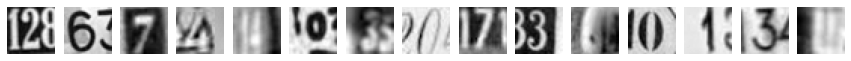

In [6]:
# visualizing the first 15 images in the dataset and their labels
print('Labels corresponding to below images: %s' % (y_train_o[0:15]))
plt.figure(figsize=(15, 1))
for i in range(15):
    plt.subplot(1, 15, i+1)
    plt.imshow(X_train_o[i], cmap="gray")
    plt.axis('off')

The images are gray-scaled images with 32x32 pixels each of 1 byte in size. So the values containing in each pixel ranges from $0$ to $2^8-1 = 255$. In order to feed them into Neural Network we must convert the input matrix to 1-D vector. Hence as part of this preprocessing step, we will do the following
*   Flatteing
*   Normalization

In [7]:
# Flatten the X_* datasets
X_train_f = X_train_o.reshape(X_train_o.shape[0], X_train_o.shape[1] * X_train_o.shape[2]).astype('float32')
X_test_f = X_test_o.reshape(X_test_o.shape[0], X_test_o.shape[1] * X_test_o.shape[2]).astype('float32')
X_val_f = X_val_o.reshape(X_val_o.shape[0], X_val_o.shape[1] * X_val_o.shape[2]).astype('float32')

print('Shape after flattening:')
print('X_train :', X_train_f.shape)
print('X_test  :', X_test_f.shape)
print('X_val   :', X_val_f.shape)

Shape after flattening:
X_train : (42000, 1024)
X_test  : (18000, 1024)
X_val   : (60000, 1024)


In [8]:

# Normalize the inputs from 0-255 to 0-1
X_train = X_train_f / 255.0
X_test = X_test_f / 255.0
X_val = X_val_f / 255.0

print(X_train)

[[0.12968785 0.11866706 0.10530196 ... 0.19477727 0.19942354 0.20799099]
 [0.34101608 0.3414451  0.34656274 ... 0.29498273 0.30054745 0.31092745]
 [0.48284313 0.49356118 0.47872823 ... 0.36837214 0.41093138 0.44637334]
 ...
 [0.6042902  0.61100274 0.6149663  ... 0.52993256 0.53592    0.5398412 ]
 [0.8137075  0.8176286  0.8353796  ... 0.83974785 0.8319055  0.820142  ]
 [0.37285647 0.37677765 0.39246237 ... 0.5414914  0.5509529  0.5509529 ]]




---

---





In [9]:
# Let's understand diversity, datatypes and distribution of the target classes.

In [10]:
# Get unique values in target sets
np.unique(y_train_o)
np.unique(y_test_o)
np.unique(y_val_o)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [11]:
# All datasets contain unsigned int8 type target class values 0-9. 
# Let's convert them into categorical and check their distribution.

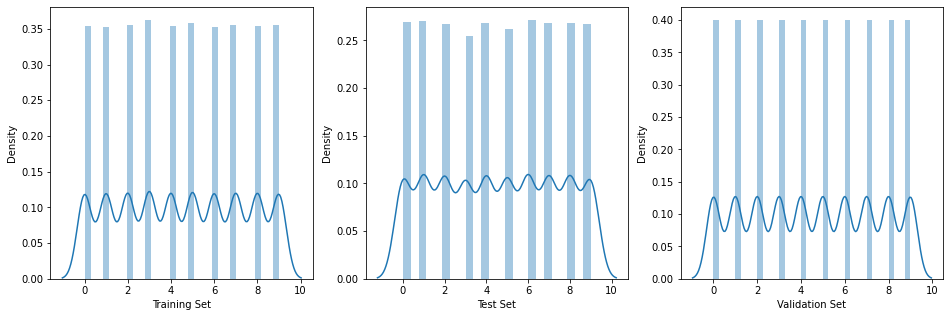

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(16,5))
sns.distplot(y_train_o, ax=axes[0], axlabel='Training Set')
sns.distplot(y_test_o, ax=axes[1], axlabel='Test Set')
sns.distplot(y_val_o, ax=axes[2], axlabel='Validation Set')

In [13]:
# Apply One-Hot-Encoding
y_train = utils.to_categorical(y_train_o)
y_test = utils.to_categorical(y_test_o)
y_val = utils.to_categorical(y_val_o)

print('Shape of different target sets are:')
print('y_train :', y_train.shape)
print('y_test  :', y_test.shape)
print('y_val   :', y_val.shape)

Shape of different target sets are:
y_train : (42000, 10)
y_test  : (18000, 10)
y_val   : (60000, 10)


In [14]:
# We will now consider a subset of the data for KNN classification. 
# K Nearest neighbours classification is a traditional ML model building. 
# We will analyze it is pertinence in the context of OCR.

In [15]:
# Take a subset of the original dataset to estimate for the best k
X_train_sub = X_train[:3000]
y_train_sub = y_train_o[:3000]
X_test_sub = X_test[:1000]
y_test_sub = y_test_o[:1000]

In [16]:
# Find accuracy scores for 30 iterations
st = time()
acc_scores = []
for k in range(1,31):
    knn = KNeighborsClassifier(n_neighbors=k , weights='uniform', metric='euclidean')
    knn.fit(X_train_sub, y_train_sub)
    acc_scores.append(accuracy_score(y_test_sub, knn.predict(X_test_sub)) * 100)
    
print('Time taken:', time()-st)
print('Scores out of 30 iterations:', np.round(acc_scores, 1))

Time taken: 164.49795198440552
Scores out of 30 iterations: [32.1 30.7 30.7 33.6 33.3 33.6 32.8 34.4 34.6 34.3 34.5 34.6 34.4 35.4
 34.7 35.8 35.4 35.5 35.  34.8 34.8 34.  33.3 34.1 33.5 33.2 33.6 33.2
 33.2 33.1]


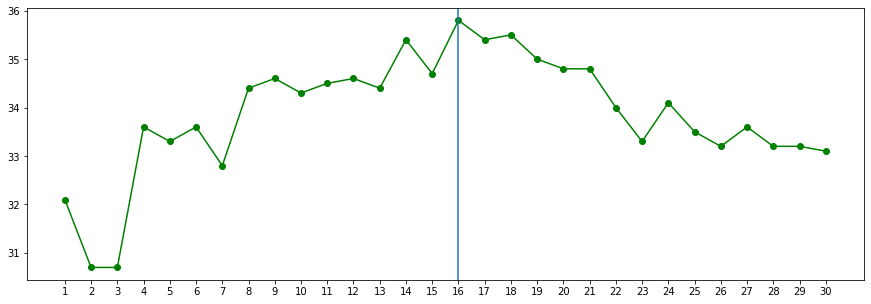

In [17]:
# Plot the accuracy scores
plt.figure(figsize=(15,5))
plt.plot(range(1,31), acc_scores , '-go')
_ = plt.xticks(range(1,31))
plt.axvline(np.argmax(acc_scores) + 1)

In [18]:
# The accuracy score seems to be the best at 35.8% for k value of 16. 
# Let's set the k value to 16 and train a model with the entire training dataset.

In [19]:
# Create the classifier model using the best k found among 30 iterations
st = time()
clf = KNeighborsClassifier(n_neighbors= np.argmax(acc_scores) + 1)
clf.fit(X_train, y_train_o)

predictions = clf.predict(X_test)
print('Time taken:', time()-st)

Time taken: 1364.1750631332397


In [20]:
# Classification Report
print("EVALUATION ON TESTING DATA")
print(classification_report(y_test_o, predictions))

EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       0.44      0.69      0.54      1814
           1       0.47      0.73      0.57      1828
           2       0.61      0.55      0.58      1803
           3       0.45      0.43      0.44      1719
           4       0.66      0.65      0.65      1812
           5       0.51      0.39      0.44      1768
           6       0.49      0.41      0.44      1832
           7       0.71      0.62      0.66      1808
           8       0.46      0.36      0.40      1812
           9       0.56      0.42      0.48      1804

    accuracy                           0.53     18000
   macro avg       0.54      0.52      0.52     18000
weighted avg       0.54      0.53      0.52     18000



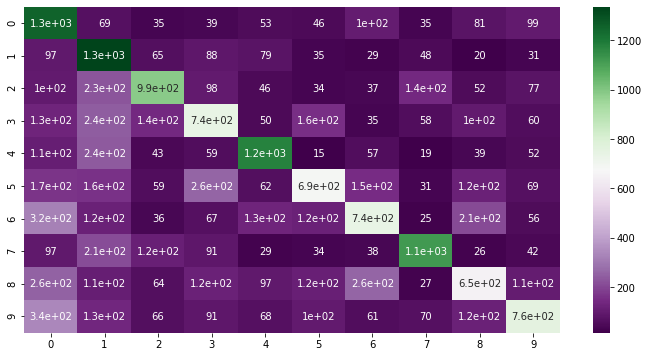

In [21]:
# Visualize the Confusion Matrix
plt.figure(figsize=(12,6))
sns.heatmap(confusion_matrix(y_test_o, predictions), annot=True, cmap="PRGn")

Observations:

Accuracy of 53% shows KNN performed very poorly.
The process with all 42000 images in the training data and 18000 images in test data took more than 30 minutes to execute.
This is one of the obvious reasons the traditional classification models are not used for OCR. Let's build a Deep Neural Network classifier and compare the performance.

A Neural Network, unlike traditional ML algorithms, is a series of algorithms that endeavors to recognize underlying relationships in a set of data through a process that mimics the way the human brain operates. Neural networks can adapt to changing input; so the network generates the best possible result without needing to redesign the output criteria.

Let's define a generic method to architect the network based on a layers array.

In [22]:
# Generic method to Build the Neural Network
def NNModel(layers):
    # Create model
    network = Sequential()
    # Add the layers
    if layers:
        for layer in layers:
            network.add(layer['layer_type'](**layer['params']))
    return network

In [23]:
#Initialize Tensorboard callback for visualization of training

# Setting the directory to store the log file
tb_callback = callbacks.TensorBoard(log_dir='.logs/{}'.format(time()), 
                                   histogram_freq=0, 
                                     write_graph=True, 
                                    write_images=True)

In [28]:
es_callback = callbacks.EarlyStopping(monitor='val_loss', 
                                      min_delta=0.001, 
                                      patience=10)

# Saving the best weights - Saves the weights when the val_loss achieves a new low value
mc_callback = callbacks.ModelCheckpoint('SVHN_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                         monitor='val_loss',
                                         verbose=1,
                                         save_best_only=True,
                                         mode='auto')



---



First Iteration
Consists of Layers:
* Dense -> 256/ReLU
* Dense -> 64/ReLU
* Dense -> 32/ReLU
* Dense -> 10/Softmax (Output)

<p>Learning Rate: 0.005</p>
<p>Momentum: 0.02</p>
<p>Epochs: 30</p>
<p>Batch Size: 200</p>
<p>Optimizer: SGD</p>
<p>Loss: Categorical Crossentropy</p>

In [29]:
# Define the layers for Iteration - 1
layers = [
    {
        'layer_type': Dense,
        'params': {
            'units': 256,
            'activation': 'relu'
        }
    },{
        'layer_type': Dense,
        'params': {
            'units': 64,
            'activation': 'relu'
        }
    },{
        'layer_type': Dense,
        'params': {
            'units': 64,
            'activation': 'relu'
        }
    },{
        'layer_type': Dense,
        'params': {
            'units': len(np.unique(y_train_o)),
            'activation': 'softmax'
        }
    }
]

# Build network architecture
model1 = NNModel(layers)

In [30]:
# Set Optimizer and Loss function for training
learning_rate = 5e-3
momentum = 2e-2

# Optimizer = SGD, Loss function = Categorical cross entropy
model1.compile(optimizer = optimizers.SGD(learning_rate, momentum), 
              loss = losses.categorical_crossentropy, 
              metrics=['accuracy'])

In [31]:
# Train the network
epochs = 30
batch_size = 200

# Start training the network
st = time()
model1.fit(X_train, y_train, 
          validation_data=(X_val, y_val), 
          epochs=epochs, 
          batch_size=batch_size, 
          verbose=2,
          callbacks=[es_callback])
print('\nTotal time taken:', time()-st)

Epoch 1/30
210/210 - 3s - loss: 2.3062 - accuracy: 0.1151 - val_loss: 2.2959 - val_accuracy: 0.1280
Epoch 2/30
210/210 - 1s - loss: 2.2925 - accuracy: 0.1431 - val_loss: 2.2896 - val_accuracy: 0.1449
Epoch 3/30
210/210 - 1s - loss: 2.2863 - accuracy: 0.1605 - val_loss: 2.2831 - val_accuracy: 0.1734
Epoch 4/30
210/210 - 1s - loss: 2.2802 - accuracy: 0.1754 - val_loss: 2.2771 - val_accuracy: 0.1929
Epoch 5/30
210/210 - 1s - loss: 2.2733 - accuracy: 0.1930 - val_loss: 2.2691 - val_accuracy: 0.2065
Epoch 6/30
210/210 - 1s - loss: 2.2650 - accuracy: 0.2075 - val_loss: 2.2603 - val_accuracy: 0.2220
Epoch 7/30
210/210 - 1s - loss: 2.2548 - accuracy: 0.2235 - val_loss: 2.2486 - val_accuracy: 0.2348
Epoch 8/30
210/210 - 1s - loss: 2.2430 - accuracy: 0.2389 - val_loss: 2.2374 - val_accuracy: 0.2347
Epoch 9/30
210/210 - 1s - loss: 2.2303 - accuracy: 0.2499 - val_loss: 2.2224 - val_accuracy: 0.2663
Epoch 10/30
210/210 - 1s - loss: 2.2154 - accuracy: 0.2619 - val_loss: 2.2069 - val_accuracy: 0.2772

In [32]:
# Print the Summary of the Network
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (200, 256)                262400    
_________________________________________________________________
dense_1 (Dense)              (200, 64)                 16448     
_________________________________________________________________
dense_2 (Dense)              (200, 64)                 4160      
_________________________________________________________________
dense_3 (Dense)              (200, 10)                 650       
Total params: 283,658
Trainable params: 283,658
Non-trainable params: 0
_________________________________________________________________


Observations:

- This is a 4 layer neural network without any regularization techniques applied.
- Though the score is better than traditional ML algorithm (k-NN), it is still not an acceptable performance.
- The network needs to be optimized in order to better learn the patterns in the dataset.
- So let's add Batch Norm & Dropout layers and use Adam optimizer in the next iteration.



---



Secod Iteration
Consists of layers:

- BatchNormalization -> (1024,)
- Dense -> 256/ReLU
- Dense -> 64/ReLU
- Dropout -> 0.2
- Dense -> 32/ReLU
- Dense -> 10/Softmax (Output)

<p>Learning Rate: 0.001</p>
<p>Epochs: 50</p>
<p>Batch Size: 150</p>
<p>Optimizer: Adam</p>
<p>Loss: Categorical Crossentropy</p>

In [34]:
# Define the layers for Iteration - 3
layers = [
    {
        'layer_type': BatchNormalization,
        'params': {
            'input_shape': (1024,)
        }
    },{
        'layer_type': Dense,
        'params': {
            'units': 256,
            'activation': 'relu'
        }
    },{
        'layer_type': Dense,
        'params': {
            'units': 64,
            'activation': 'relu'
        }
    },{
        'layer_type': Dropout,
        'params': {
            'rate': 0.2
        }
    },{
        'layer_type': Dense,
        'params': {
            'units': 32,
            'activation': 'relu'
        }
    },{
        'layer_type': Dense,
        'params': {
            'units': len(np.unique(y_train_o)),
            'activation': 'softmax'
        }
    }
]

# Build network architecture
model2 = NNModel(layers)

In [35]:
# Set Optimizer and Loss function for training

learning_rate = 1e-3

# Optimizer = Adam, Loss function = Categorical cross entropy
model2.compile(optimizer = optimizers.Adam(lr=learning_rate), 
              loss = losses.categorical_crossentropy, 
              metrics=['accuracy'])

In [36]:
# Train the network
epochs = 50
batch_size = 150
# Start training the network
st = time()
model2.fit(X_train, y_train, 
          validation_data=(X_val, y_val), 
          epochs=epochs, 
          batch_size=batch_size, 
          verbose=2,
          callbacks=[es_callback])
print('\nTotal time taken:', time()-st)

Epoch 1/50
280/280 - 2s - loss: 1.6571 - accuracy: 0.4324 - val_loss: 1.1884 - val_accuracy: 0.6805
Epoch 2/50
280/280 - 1s - loss: 1.0959 - accuracy: 0.6537 - val_loss: 0.8564 - val_accuracy: 0.7416
Epoch 3/50
280/280 - 1s - loss: 0.9270 - accuracy: 0.7095 - val_loss: 0.7387 - val_accuracy: 0.7743
Epoch 4/50
280/280 - 1s - loss: 0.8427 - accuracy: 0.7337 - val_loss: 0.6845 - val_accuracy: 0.7891
Epoch 5/50
280/280 - 1s - loss: 0.7686 - accuracy: 0.7592 - val_loss: 0.6535 - val_accuracy: 0.7973
Epoch 6/50
280/280 - 1s - loss: 0.7106 - accuracy: 0.7781 - val_loss: 0.6151 - val_accuracy: 0.8123
Epoch 7/50
280/280 - 1s - loss: 0.6749 - accuracy: 0.7855 - val_loss: 0.5585 - val_accuracy: 0.8285
Epoch 8/50
280/280 - 1s - loss: 0.6445 - accuracy: 0.7969 - val_loss: 0.5659 - val_accuracy: 0.8245
Epoch 9/50
280/280 - 1s - loss: 0.6124 - accuracy: 0.8060 - val_loss: 0.5150 - val_accuracy: 0.8414
Epoch 10/50
280/280 - 1s - loss: 0.5854 - accuracy: 0.8148 - val_loss: 0.5014 - val_accuracy: 0.8469

In [37]:
# Print the Summary of the Network
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 1024)              4096      
_________________________________________________________________
dense_8 (Dense)              (None, 256)               262400    
_________________________________________________________________
dense_9 (Dense)              (None, 64)                16448     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                330       
Total params: 285,354
Trainable params: 283,306
Non-trainable params: 2,048
____________________________________________

Observations:

- This network consists of 4 dense layers along with one batch norm layer and one dropout layer.
- The performance of this network is also very good with 90% train accuracy and 91% of validation accuracy.

It is noticed that the network in iteration 2 performed very well. Hence we will consider this model2 to evaluate the SVHN dataset.



---




# Evaluate trained model on test data

In [39]:
predictions = model2.predict_classes(X_test)
score = model2.evaluate(X_test, y_test)
print('Test loss      :', score[0])
print('Test accuracy  :', score[1])

563/563 [==============================] - 2s 3ms/step - loss: 0.5270 - accuracy: 0.8596
Test loss      : 0.5270028114318848
Test accuracy  : 0.8595555424690247


In [40]:
# Classification Report
print("EVALUATION ON TESTING DATA")
print(classification_report(y_test_o, predictions))

EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1814
           1       0.85      0.89      0.87      1828
           2       0.90      0.86      0.88      1803
           3       0.83      0.80      0.81      1719
           4       0.92      0.88      0.90      1812
           5       0.83      0.86      0.84      1768
           6       0.86      0.84      0.85      1832
           7       0.86      0.92      0.89      1808
           8       0.79      0.84      0.82      1812
           9       0.87      0.82      0.85      1804

    accuracy                           0.86     18000
   macro avg       0.86      0.86      0.86     18000
weighted avg       0.86      0.86      0.86     18000



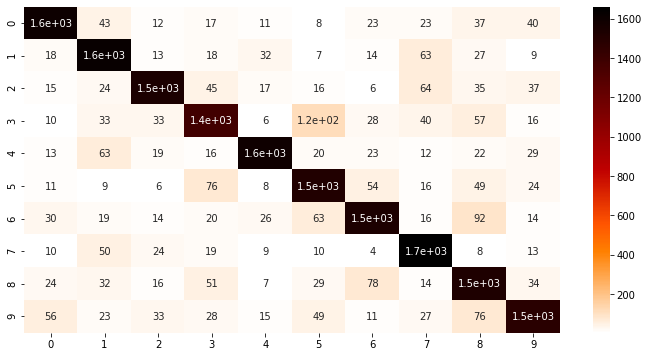

In [41]:
# Visualize the Confusion Matrix
plt.figure(figsize=(12,6))
sns.heatmap(confusion_matrix(y_test_o, predictions), annot=True, cmap="gist_heat_r")

Actual labels corresponding to below images: [1 7 2 9 0 9 1 8 4 4 8 9 1 4 3]
Predicted labels corresponding to below images: [1 7 2 9 0 9 1 6 1 4 8 5 1 4 3]


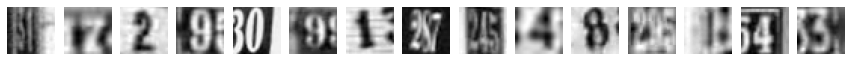

In [42]:

# visualizing the first 15 images in the dataset and their labels
print('Actual labels corresponding to below images: %s' % (y_test_o[0:15]))
plt.figure(figsize=(15, 1))
for i in range(15):
    plt.subplot(1, 15, i+1)
    plt.imshow(X_test_o[i], cmap="gray")
    plt.axis('off')
    
print('Predicted labels corresponding to below images: %s' % (predictions[0:15]))

In [43]:
# Set the paths to store the model and weights
model2.save('SVHN_DeepNN_model.h5')
model2.save_weights('SVHN_DeepNN_weights.h5')

------------------------------

Analysis:
Deep Neural networks are always preferred over traditional machine learning algorithms when it comes to OCR because it able to work with huge amount of data, particularly, multi - dimensional data and also able to perform better than that of traditional KNN model.